In [8]:
import numpy as np
import matplotlib.pyplot as plt
import glob

def get_month(file):
    with open(file, 'r', encoding='utf-8') as lines:
        lines = lines.readlines()
        
    
    return int(lines[1].split('/')[1])

def sort_files(files):
    #Dateien nach Monat sortieren
    for i in range(1, len(files)):
        file = files[i] 
        month = get_month(file) 

        j = i-1
        while j >= 0 and month < get_month(files[j]):
                files[j + 1] = files[j]
                j -= 1
        files[j + 1] = file
        
    return files
    
files = glob.glob('../SimulationPrograms/datafiles/sunData/*.sundata')
files = sort_files(files)


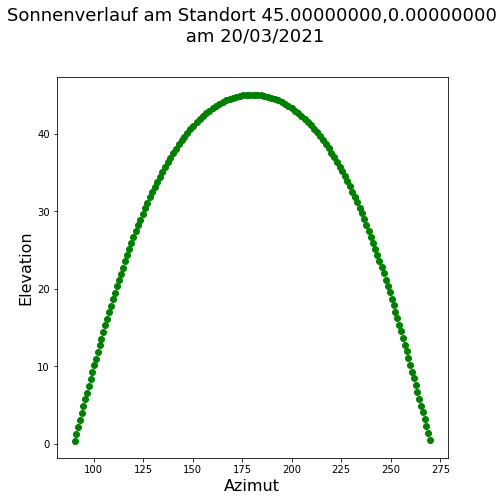

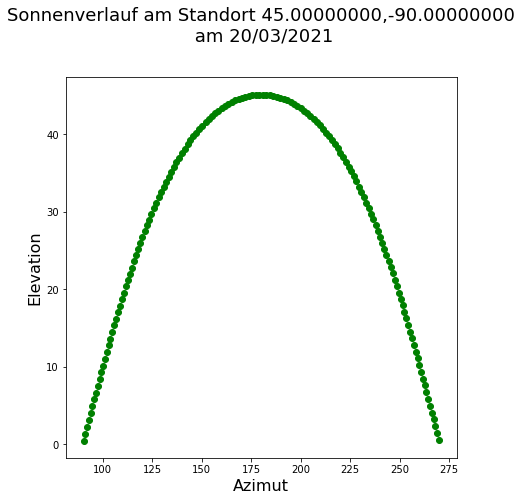

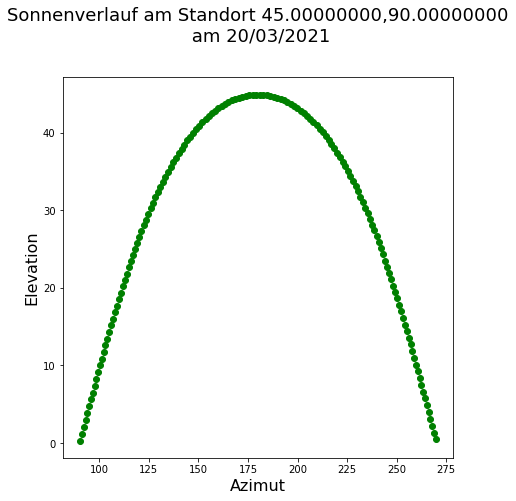

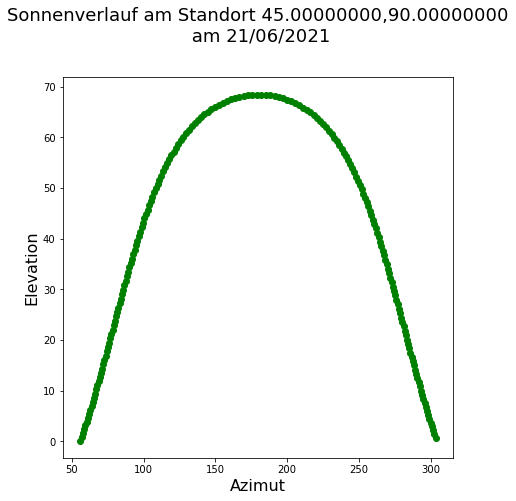

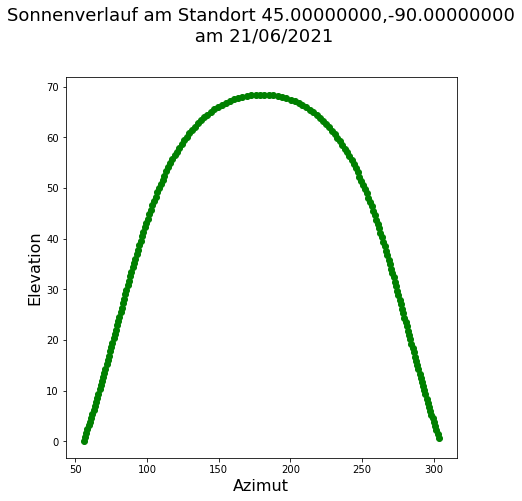

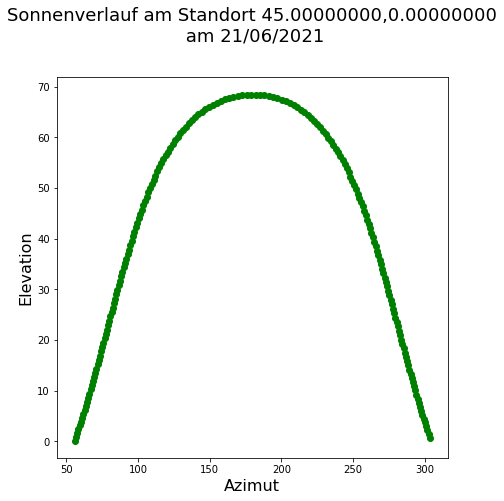

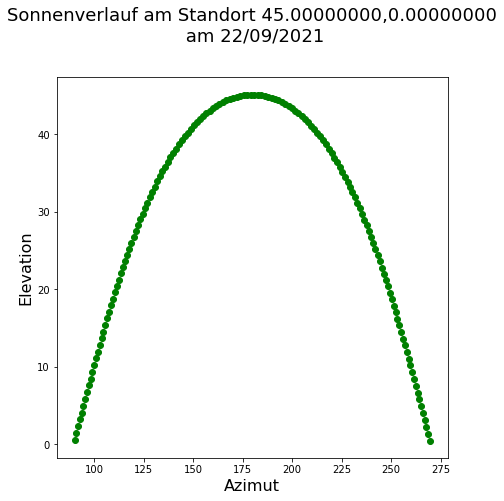

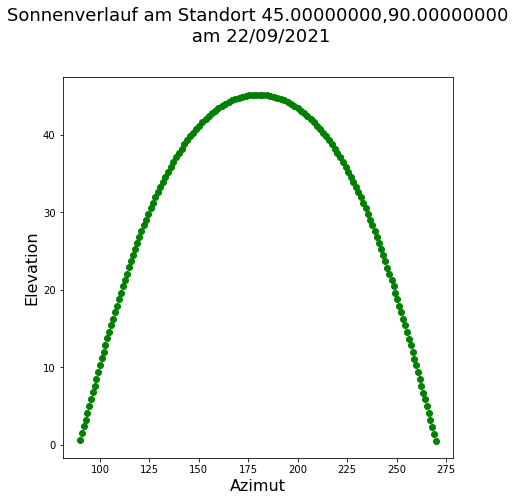

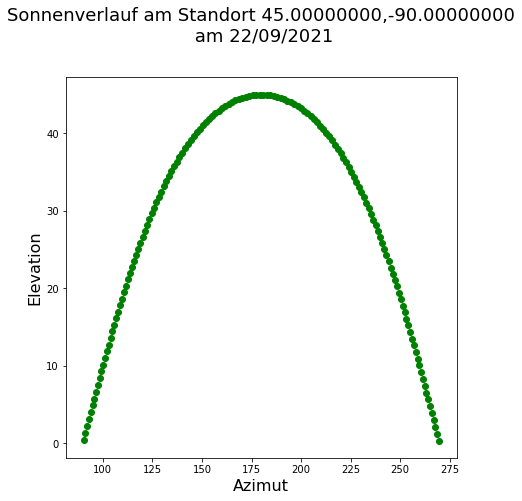

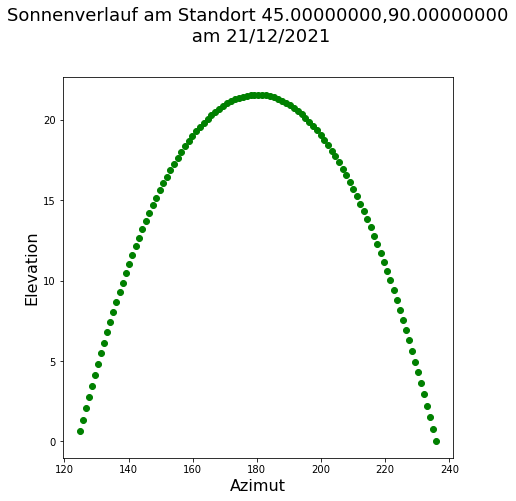

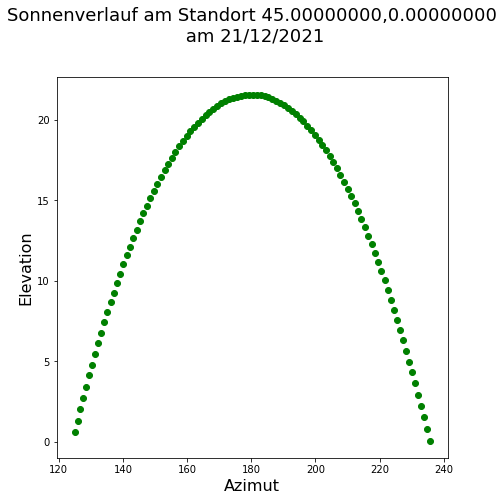

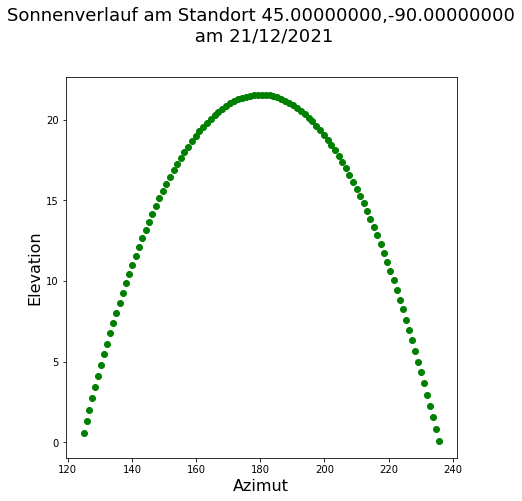

In [12]:

for file in files:
    
    with open(file, 'r', encoding='utf-8') as lines:
        lines = lines.readlines()
    
    location = lines[0]
    date = lines[1]
    time = lines[2].split(':')
    time = time[0]*60+ time[1]

    elevation = np.array([])
    azimut = np.array([])

    for i in range(3, len(lines)):
        sun_pos = lines[i].split(';')
        azimut = np.append(azimut, float(sun_pos[0])) 
        elevation = np.append(elevation, float(sun_pos[1]))

    fig = plt.figure(figsize=(7,7))
    plt.title(("Sonnenverlauf am Standort " + location + " am " + date), fontsize=18, pad=15)
    plt.xlabel('Azimut', fontsize=16)
    plt.ylabel('Elevation', fontsize=16)

    length = len(lines)-3

    #Genauigkeit der Messung
    difference = [np.full(length, 1), np.full(length, 5)]

    #Abweichung berechnen
    #az1 = np.subtract(azimut, difference[0])
    #az2 = np.add(azimut, difference[0])
    #el1 = np.subtract(elevation, difference[1])
    #el2 = np.add(elevation, difference[1])'

    plt.plot(azimut, elevation, 'go') #, az1, el1, 'go', az2, el2, 'ro')
    plt.show()